  Country        City  AccentCity  Region  Population   Latitude  Longitude
0      ad       aixas       Aixàs     6.0         NaN  42.483333   1.466667
1      ad  aixirivali  Aixirivali     6.0         NaN  42.466667   1.500000
2      ad  aixirivall  Aixirivall     6.0         NaN  42.466667   1.500000
3      ad   aixirvall   Aixirvall     6.0         NaN  42.466667   1.500000
4      ad    aixovall    Aixovall     6.0         NaN  42.466667   1.483333
Missing values:
Country            0
City               1
AccentCity         0
Region             2
Population    118133
Latitude           0
Longitude          0
dtype: int64


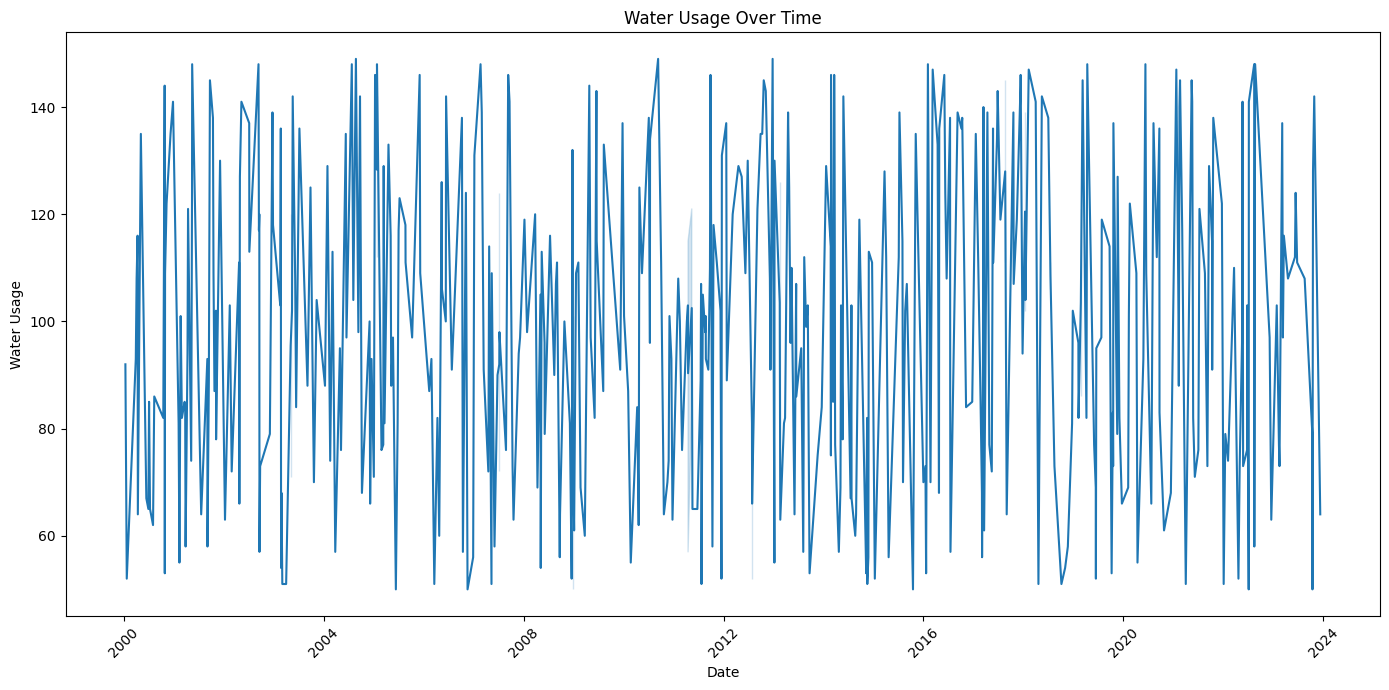

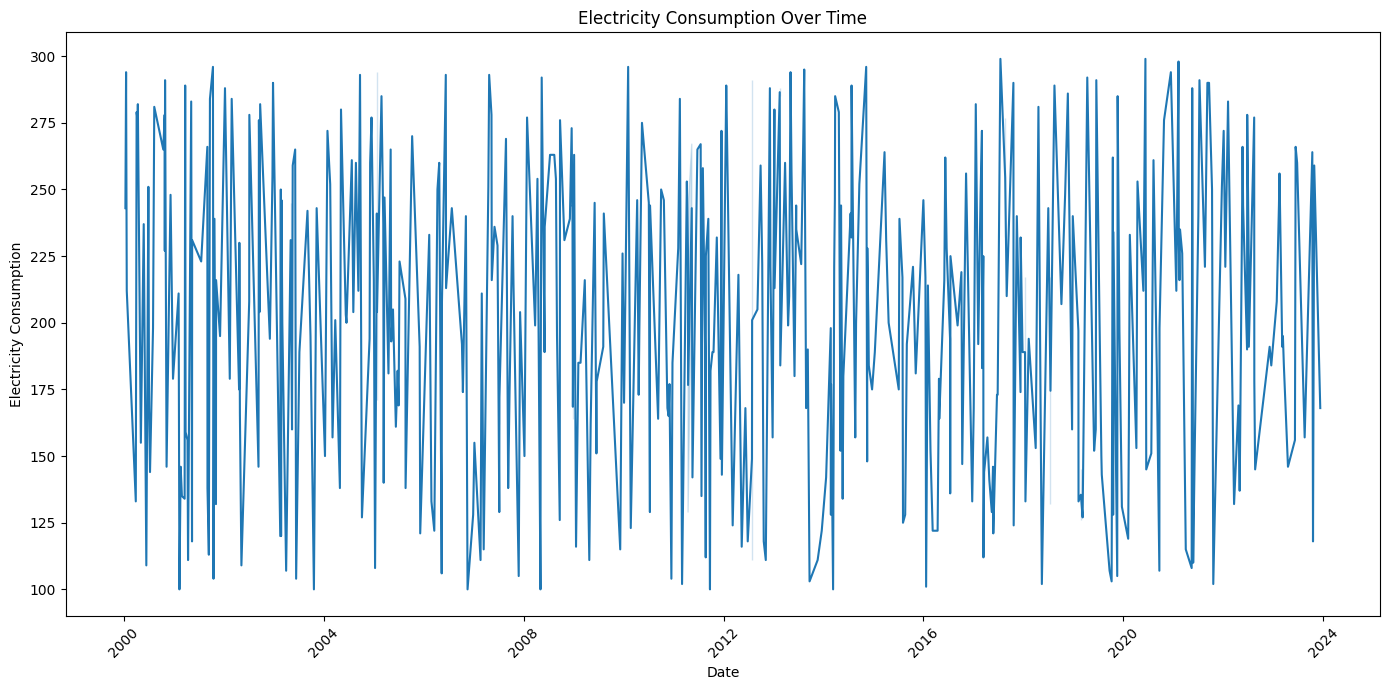

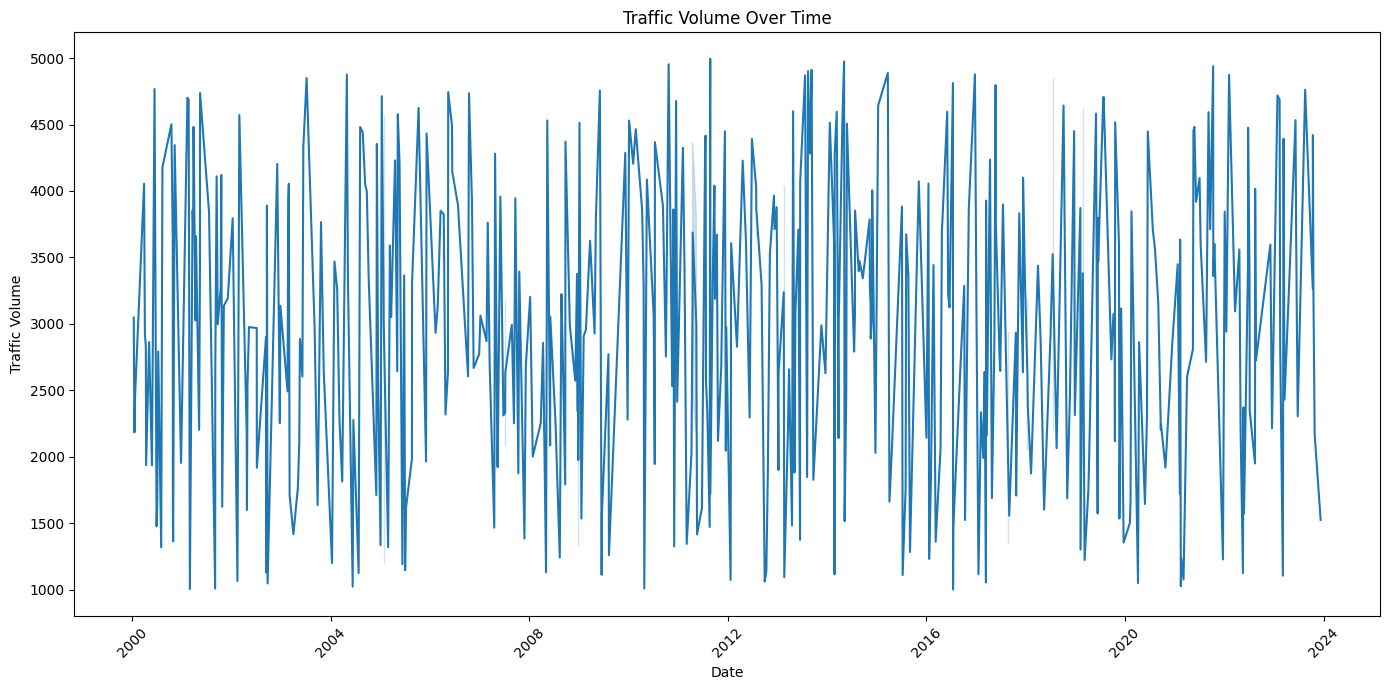

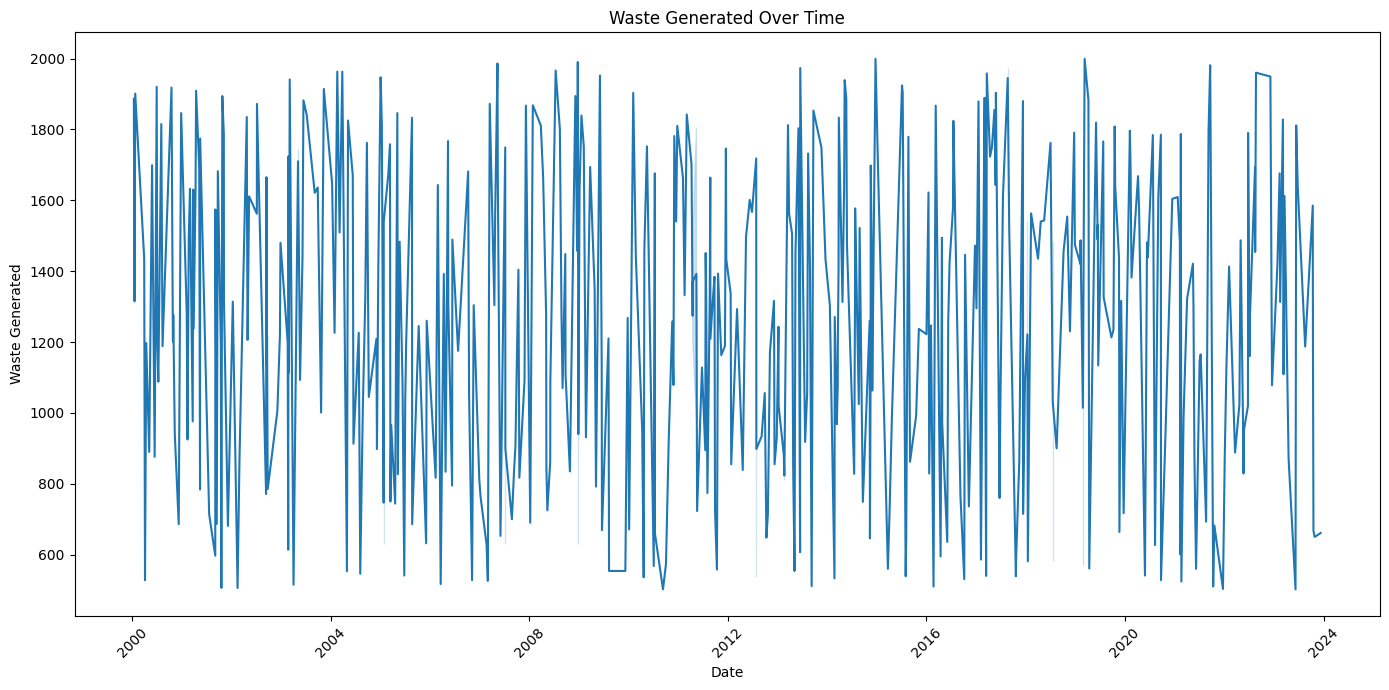

Linear Regression Metrics:
MAE: 25.76394642558922
RMSE: 30.568346158550465


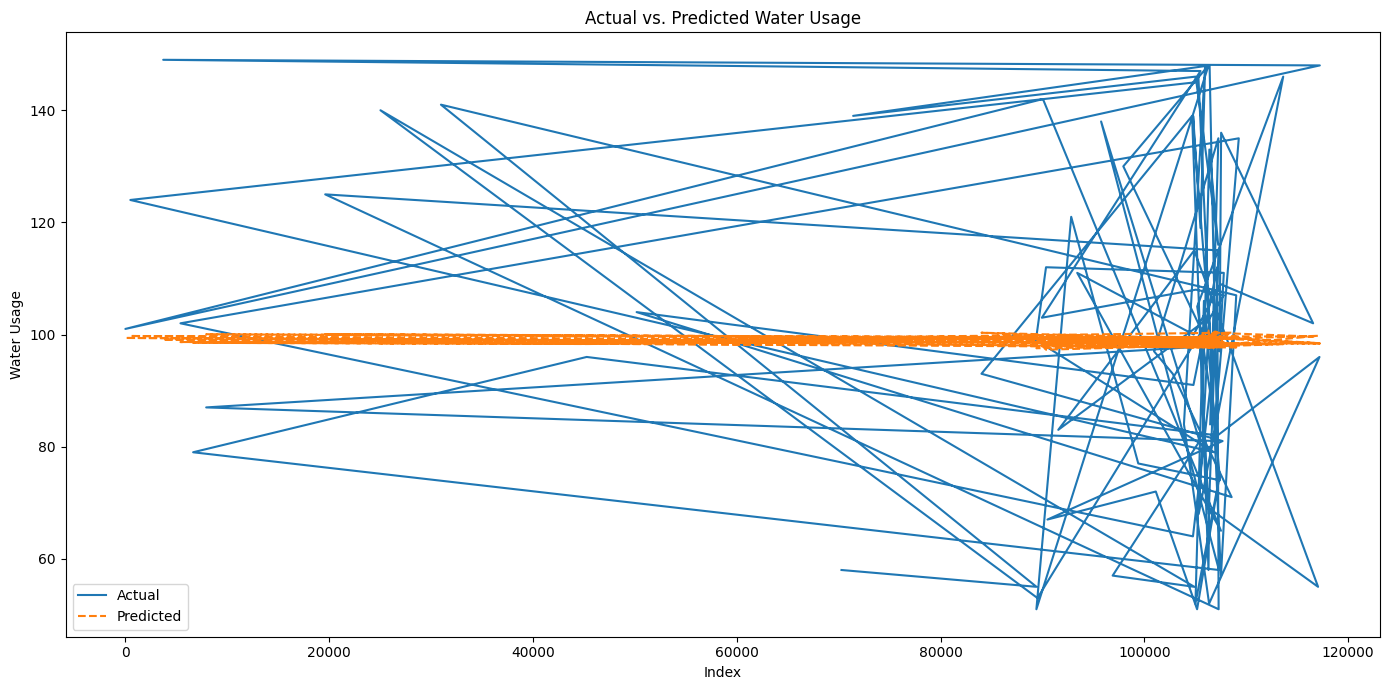

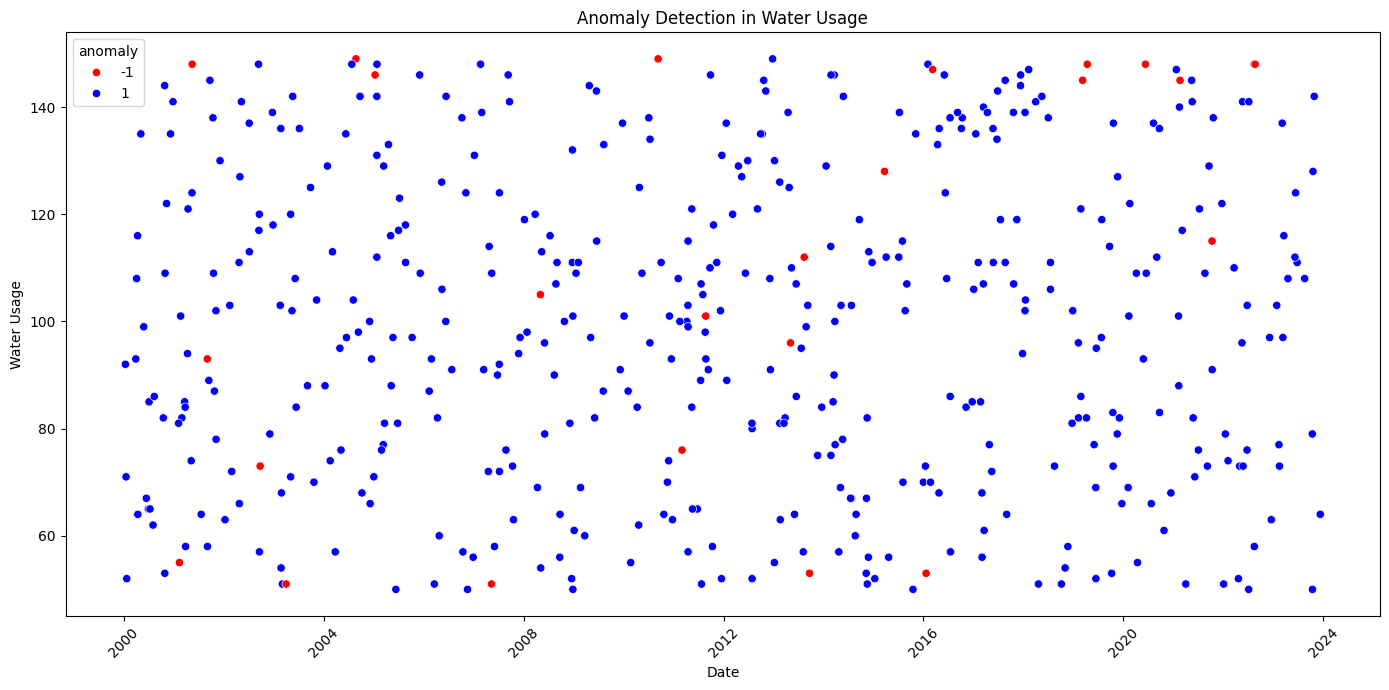

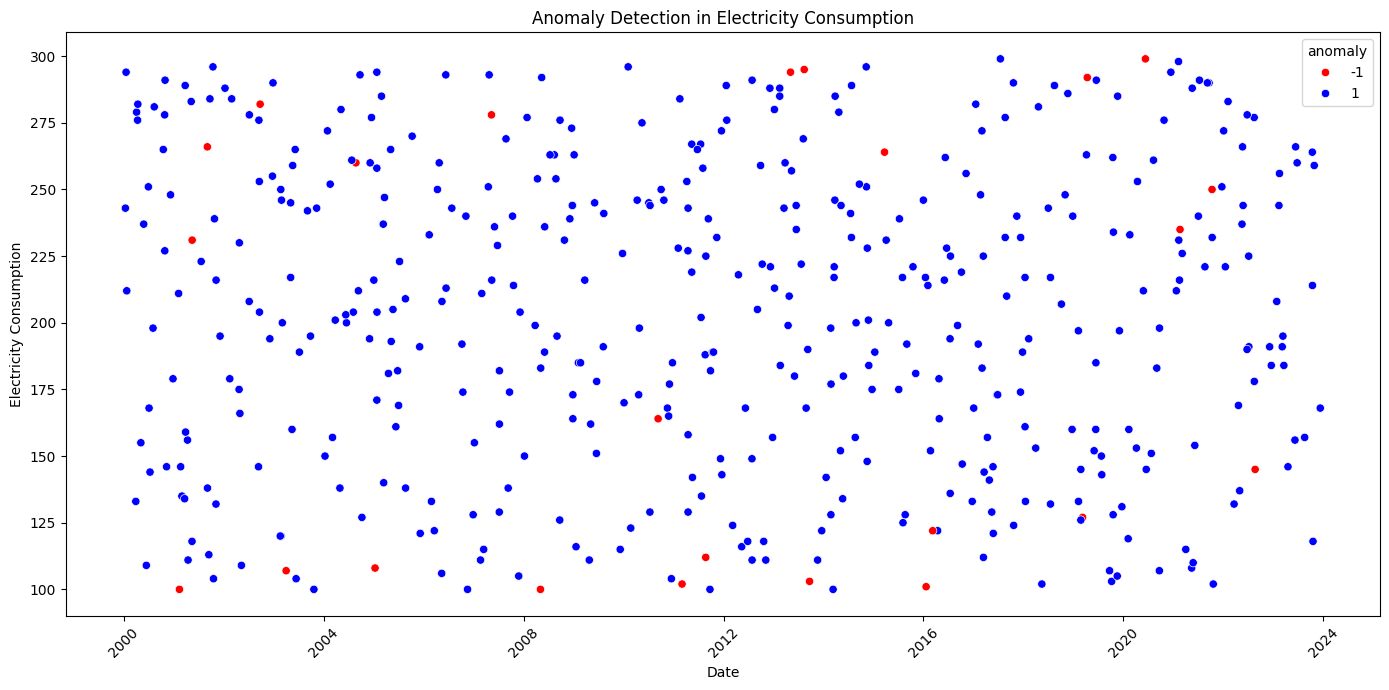

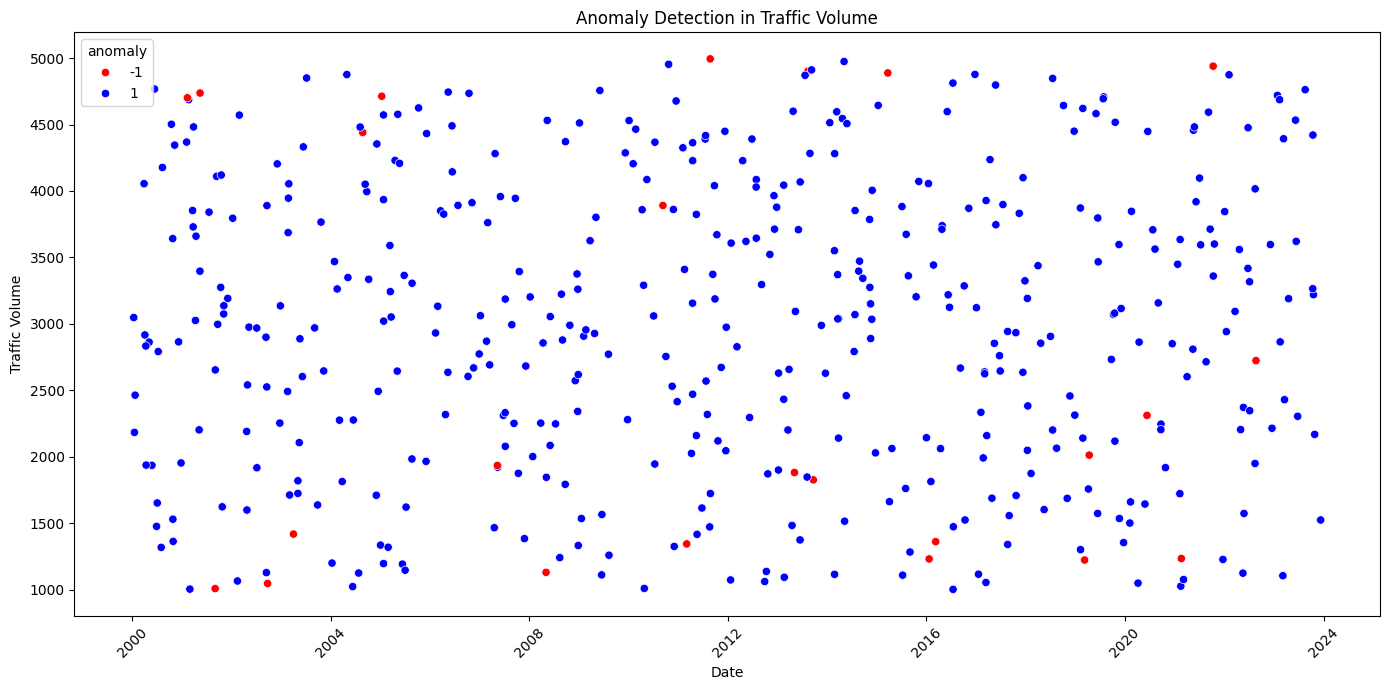

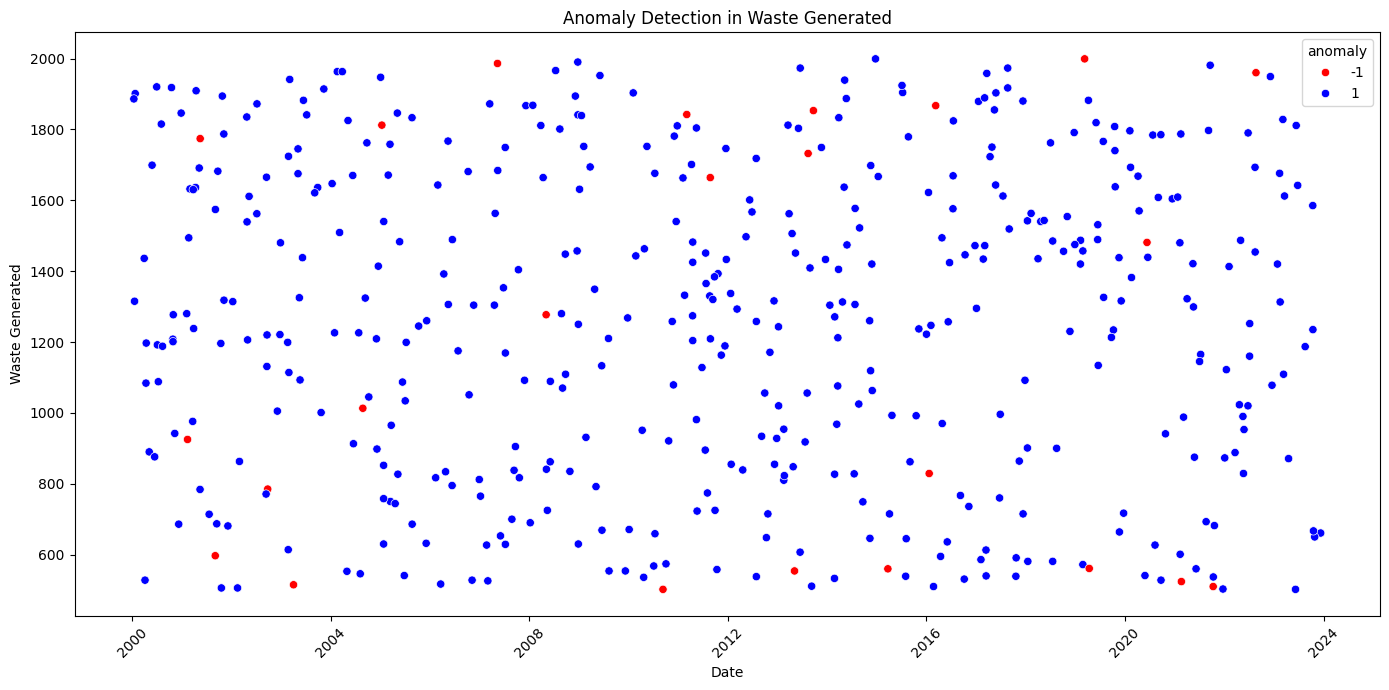

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load data from Kaggle dataset
cities_df = pd.read_csv('worldcitiespop.csv')

# Display the first few rows of the dataframe
print(cities_df.head())

# Check for missing values
print("Missing values:")
print(cities_df.isnull().sum())

# Drop rows with missing values for simplicity
cities_df.dropna(inplace=True)

# Assume we have columns for different resource usage, add dummy data for illustration
np.random.seed(42)
cities_df['water_usage'] = np.random.randint(50, 150, size=len(cities_df))
cities_df['electricity_consumption'] = np.random.randint(100, 300, size=len(cities_df))
cities_df['traffic_volume'] = np.random.randint(1000, 5000, size=len(cities_df))
cities_df['waste_generated'] = np.random.randint(500, 2000, size=len(cities_df))

# Feature engineering (extract year, month, and random date)
cities_df['year'] = np.random.randint(2000, 2024, size=len(cities_df))
cities_df['month'] = np.random.randint(1, 13, size=len(cities_df))
cities_df['day'] = np.random.randint(1, 29, size=len(cities_df))
cities_df['date'] = pd.to_datetime(cities_df[['year', 'month', 'day']])

# Visualize water usage over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=cities_df, x='date', y='water_usage')
plt.title('Water Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Water Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize electricity consumption over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=cities_df, x='date', y='electricity_consumption')
plt.title('Electricity Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize traffic volume over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=cities_df, x='date', y='traffic_volume')
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize waste generated over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=cities_df, x='date', y='waste_generated')
plt.title('Waste Generated Over Time')
plt.xlabel('Date')
plt.ylabel('Waste Generated')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Prepare features and target for forecasting water usage
X = cities_df[['year', 'month', 'day']]
y = cities_df['water_usage']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model for forecasting water usage
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Linear Regression Metrics:')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

# Visualize actual vs. predicted water usage
plt.figure(figsize=(14, 7))
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs. Predicted Water Usage')
plt.xlabel('Index')
plt.ylabel('Water Usage')
plt.legend()
plt.tight_layout()
plt.show()

# Use resource consumption data for anomaly detection
features = ['water_usage', 'electricity_consumption', 'traffic_volume', 'waste_generated']
X_anomaly = cities_df[features]

# Normalize data
scaler = StandardScaler()
X_anomaly_scaled = scaler.fit_transform(X_anomaly)

# Train Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_anomaly_scaled)

# Detect anomalies
anomalies = iso_forest.predict(X_anomaly_scaled)

# Add anomaly labels to the dataframe
cities_df['anomaly'] = anomalies

# Visualize anomalies in water usage
plt.figure(figsize=(14, 7))
sns.scatterplot(data=cities_df, x='date', y='water_usage', hue='anomaly', palette=['red', 'blue'])
plt.title('Anomaly Detection in Water Usage')
plt.xlabel('Date')
plt.ylabel('Water Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize anomalies in electricity consumption
plt.figure(figsize=(14, 7))
sns.scatterplot(data=cities_df, x='date', y='electricity_consumption', hue='anomaly', palette=['red', 'blue'])
plt.title('Anomaly Detection in Electricity Consumption')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize anomalies in traffic volume
plt.figure(figsize=(14, 7))
sns.scatterplot(data=cities_df, x='date', y='traffic_volume', hue='anomaly', palette=['red', 'blue'])
plt.title('Anomaly Detection in Traffic Volume')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize anomalies in waste generated
plt.figure(figsize=(14, 7))
sns.scatterplot(data=cities_df, x='date', y='waste_generated', hue='anomaly', palette=['red', 'blue'])
plt.title('Anomaly Detection in Waste Generated')
plt.xlabel('Date')
plt.ylabel('Waste Generated')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
